<a href="https://colab.research.google.com/github/Ashugujjar3/algo-Graph-Algorithms--Ashu/blob/main/Graph_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install memory-profiler

In [2]:
%load_ext memory_profiler

In [3]:
import time
# memory_profiler is loaded as an extension

In [4]:
class SocialNetwork:
    """
    Represents a social network graph to find friend suggestions.
    Uses an adjacency list for storage.
    """
    def __init__(self):
        # Graph Modeling: Represent users as nodes
        # Use an adjacency list
        self.adj_list = {}

    def add_user(self, user):
        """Adds a user (node) to the graph."""
        if user not in self.adj_list:
            self.adj_list[user] = set()

    def add_friendship(self, user1, user2):
        """Adds a friendship (undirected edge) between two users."""
        self.add_user(user1)
        self.add_user(user2)
        self.adj_list[user1].add(user2)
        self.adj_list[user2].add(user1)

    def get_friend_suggestions(self, user):
        """
        Suggests new connections based on mutual friends (friends of friends).

        """
        if user not in self.adj_list:
            return f"User '{user}' not found in the network."

        suggestions = set()
        direct_friends = self.adj_list[user]

        # Algorithm Design: Perform a 2-level traversal (BFS/DFS logic)
        # 1. Iterate through all direct friends (Level 1)
        for friend in direct_friends:
            # 2. Iterate through their friends (Level 2)
            for friend_of_friend in self.adj_list[friend]:

                # Identify "friends of friends"
                # A person is a valid suggestion if:
                # 1. They are NOT the original user
                # 2. They are NOT already a direct friend
                if friend_of_friend != user and friend_of_friend not in direct_friends:
                    suggestions.add(friend_of_friend)

        # Output: List of suggested friends
        return list(suggestions)

In [5]:
# --- 1. Graph Modeling & Input ---
network = SocialNetwork()

# Sample graph connections
network.add_friendship('Alice', 'Bob')
network.add_friendship('Alice', 'Carol')
network.add_friendship('Bob', 'David')
network.add_friendship('Bob', 'Eve')
network.add_friendship('Carol', 'David')
network.add_friendship('Carol', 'Fiona')
network.add_friendship('David', 'Eve')
network.add_friendship('Eve', 'Fiona')
network.add_friendship('Eve', 'George') # George is Eve's friend

print("--- Problem 1: Social Network Friend Suggestion ---")
print("Graph network created and populated with sample data.")

--- Problem 1: Social Network Friend Suggestion ---
Graph network created and populated with sample data.


In [6]:
# --- 2. Algorithm Execution & Profiling ---
target_user = 'Alice'
print(f"Finding friend suggestions for: {target_user}")

# Use time module to measure execution time
start_time = time.time()

suggestions = network.get_friend_suggestions(target_user)

end_time = time.time()

# --- 3. Output ---
print(f"\nGraph Adjacency List: {network.adj_list}")
print(f"Direct friends for {target_user}: {list(network.adj_list[target_user])}")
print(f"Suggested friends for {target_user}: {suggestions}")

print(f"\nExecution Time: {end_time - start_time:.9f} seconds")

Finding friend suggestions for: Alice

Graph Adjacency List: {'Alice': {'Bob', 'Carol'}, 'Bob': {'Alice', 'Eve', 'David'}, 'Carol': {'Fiona', 'Alice', 'David'}, 'David': {'Bob', 'Eve', 'Carol'}, 'Eve': {'Fiona', 'Bob', 'George', 'David'}, 'Fiona': {'Eve', 'Carol'}, 'George': {'Eve'}}
Direct friends for Alice: ['Bob', 'Carol']
Suggested friends for Alice: ['Fiona', 'Eve', 'David']

Execution Time: 0.000075579 seconds


**Problem 2: Route Finding on Google Maps**

In [7]:
!pip install networkx matplotlib

In [8]:
import time
import networkx as nx
import matplotlib.pyplot as plt
import sys # Needed for infinity

In [9]:
class Graph:
    def __init__(self, vertices):
        self.V = vertices  # Number of vertices
        self.graph = []    # List to store edges: (source, destination, weight)

    def add_edge(self, u, v, w):
        """
        Adds a directed edge from u to v with weight w.
        Input format: (source, destination, weight)
        """
        self.graph.append([u, v, w])

    def bellman_ford(self, src):
        """
        Implements Bellman-Ford algorithm for shortest path computation.
        Finds shortest paths from src to all other vertices.
        """
        # 1. Initialize distances
        dist = {node: float('Inf') for node in range(self.V)}
        dist[src] = 0

        # 2. Relax all edges |V| - 1 times
        for _ in range(self.V - 1):
            for u, v, w in self.graph:
                if dist[u] != float('Inf') and dist[u] + w < dist[v]:
                    dist[v] = dist[u] + w

        # 3. Detect negative weight cycles
        for u, v, w in self.graph:
            if dist[u] != float('Inf') and dist[u] + w < dist[v]:
                print("\n--- Negative Weight Cycle Detected! ---")
                print(f"Edge {u}->{v} is part of a negative cycle.")
                return None  # Return None to indicate a cycle

        # Output: Distance array
        return dist

In [10]:
def draw_graph(edges, title):
    """
    Visualizes the directed, weighted graph using NetworkX and Matplotlib.
    """
    G = nx.DiGraph() # Create a Directed Graph

    for u, v, w in edges:
        G.add_edge(u, v, weight=w)

    # Position nodes using a spring layout
    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_color='lightblue',
            node_size=700, font_size=10, arrowsize=20)

    # Draw edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title(title)
    plt.show()

In [11]:
# --- 1. Graph Modeling & Input ---
num_vertices = 5
g = Graph(num_vertices)

# Represent cities/locations as nodes and roads as directed edges
# Input: List of edges with weights
edges = [
    [0, 1, -1],  # Includes negative weights
    [0, 2, 4],
    [1, 2, 3],
    [1, 3, 2],
    [1, 4, 2],
    [3, 2, 5],
    [3, 1, 1],
    [4, 3, -3]  # Negative weight
]

for edge in edges:
    g.add_edge(edge[0], edge[1], edge[2])

source_node = 0

print("--- Problem 2: Route Finding on Google Maps ---")
print(f"Graph created with {num_vertices} vertices and {len(edges)} edges.")
print(f"Finding shortest paths from source node: {source_node}")

--- Problem 2: Route Finding on Google Maps ---
Graph created with 5 vertices and 8 edges.
Finding shortest paths from source node: 0


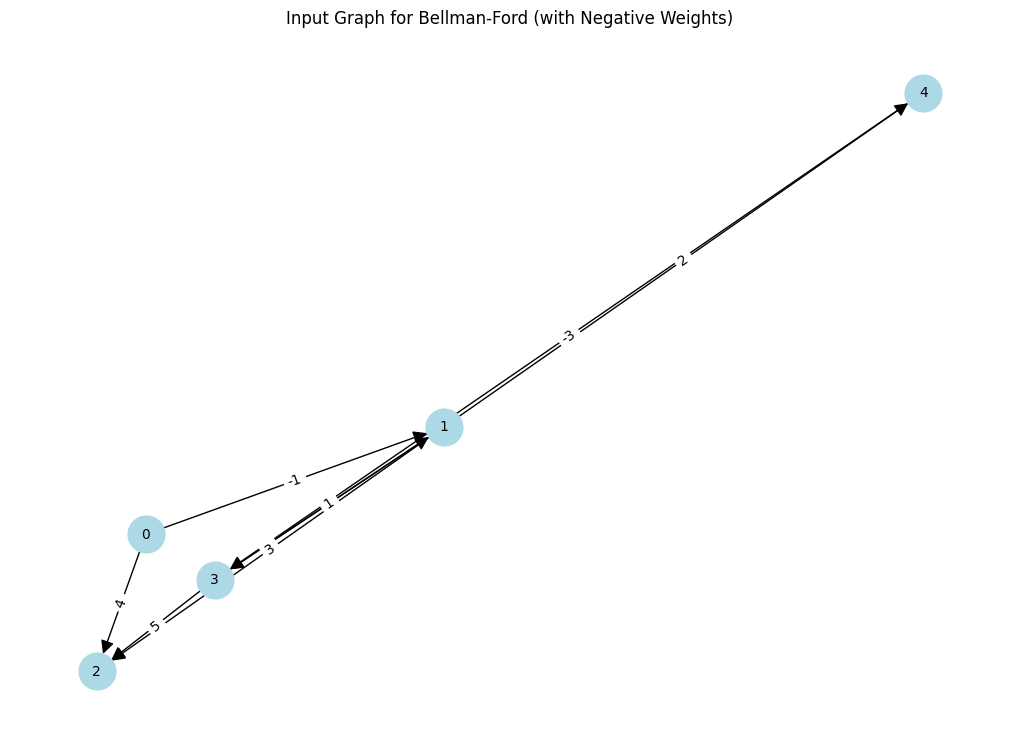

In [12]:
# --- Visualize the Input Graph ---
draw_graph(edges, "Input Graph for Bellman-Ford (with Negative Weights)")

In [13]:
# --- 2. Algorithm Execution & Profiling ---

# Use time module to measure execution time
start_time = time.time()

distances = g.bellman_ford(source_node)

end_time = time.time()

# --- 3. Output ---
if distances:
    print("\n--- Bellman-Ford Results ---")
    print(f"Shortest distances from source node {source_node}:")
    for node, distance in distances.items():
        print(f"  Node {node}: {distance}")

print(f"\nExecution Time: {end_time - start_time:.9f} seconds")


--- Bellman-Ford Results ---
Shortest distances from source node 0:
  Node 0: 0
  Node 1: -1
  Node 2: 2
  Node 3: -2
  Node 4: 1

Execution Time: 0.002929211 seconds


In [14]:
# --- 4. Analysis ---
print("\n--- Analysis ---")
print(f"Time Complexity: O(V*E). The algorithm relaxes all E edges in the outer loop, and this loop runs V-1 times. The final check for negative cycles takes O(E). Therefore, the total time is O(VE).")
print("Why Bellman-Ford? Bellman-Ford is preferred over Dijkstra's for graphs with negative edge weights because Dijkstra's greedy approach fails in this scenario. [cite: 74] Dijkstra's assumes that once a node's distance is finalized, it's the shortest path, but a future negative edge could violate this. Bellman-Ford's iterative approach correctly handles this, and it can also detect negative weight cycles, which represent an undefined shortest path.")


--- Analysis ---
Time Complexity: O(V*E). The algorithm relaxes all E edges in the outer loop, and this loop runs V-1 times. The final check for negative cycles takes O(E). Therefore, the total time is O(VE).
Why Bellman-Ford? Bellman-Ford is preferred over Dijkstra's for graphs with negative edge weights because Dijkstra's greedy approach fails in this scenario. [cite: 74] Dijkstra's assumes that once a node's distance is finalized, it's the shortest path, but a future negative edge could violate this. Bellman-Ford's iterative approach correctly handles this, and it can also detect negative weight cycles, which represent an undefined shortest path.


**Problem 3: Emergency Response System**

In [15]:
import time
import heapq  # For the priority queue
import networkx as nx
import matplotlib.pyplot as plt
import sys

In [16]:
class Graph:
    def __init__(self):
        # Graph Modeling: Use an adjacency list
        self.adj = {}
        self.nodes = set()

    def add_node(self, node):
        if node not in self.adj:
            self.adj[node] = []
        self.nodes.add(node)

    def add_edge(self, u, v, weight):
        """
        Adds a directed edge (u -> v) with a positive weight (travel time).
        """
        self.add_node(u)
        self.add_node(v)
        # Storing as (weight, destination) for easy use with heapq
        self.adj[u].append((weight, v))
        # Note: For a real-world map, you'd likely add the reverse edge too
        # self.adj[v].append((weight, u))

    def dijkstra(self, start_node):
        """
        Implements Dijkstra's algorithm using a min-heap.
        Finds the fastest route from the start_node to all other nodes.
        """
        if start_node not in self.adj:
            return f"Node {start_node} not in graph."

        # Initialize distances
        distances = {node: float('inf') for node in self.nodes}
        distances[start_node] = 0

        # Priority queue (min-heap)
        # Stores tuples of (current_distance, node)
        priority_queue = [(0, start_node)]

        while priority_queue:
            # Pop the node with the smallest distance
            current_dist, current_node = heapq.heappop(priority_queue)

            # If this path is already worse than one we've found, skip it
            if current_dist > distances[current_node]:
                continue

            # Iterate over neighbors
            for weight, neighbor in self.adj[current_node]:
                distance = current_dist + weight

                # If a new, shorter path is found
                if distance < distances[neighbor]:
                    distances[neighbor] = distance
                    # Push the new path to the priority queue
                    heapq.heappush(priority_queue, (distance, neighbor))

        # Output: Shortest distances
        return distances

In [17]:
def draw_graph(adjacency_list, title):
    """
    Visualizes the directed, weighted graph from an adjacency list.
    """
    G = nx.DiGraph()
    edge_list = []

    for source, neighbors in adjacency_list.items():
        G.add_node(source)
        for weight, destination in neighbors:
            G.add_node(destination)
            G.add_edge(source, destination, weight=weight)
            edge_list.append((source, destination, weight))

    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, with_labels=True, node_color='lightcoral',
            node_size=700, font_size=10, arrowsize=20)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title(title)
    plt.show()

In [18]:
# --- 1. Graph Modeling & Input ---
g = Graph()

# Input: List of edges with weights (travel times)
# (Source, Destination, Weight)
edges = [
    ('A', 'B', 5),
    ('A', 'C', 10),
    ('B', 'C', 3),
    ('B', 'D', 8),
    ('C', 'D', 2),
    ('C', 'E', 15),
    ('D', 'E', 5),
    ('D', 'F', 6),
    ('E', 'F', 1)
]

for u, v, w in edges:
    g.add_edge(u, v, w)

source_node = 'A'  # The location of the emergency

print("--- Problem 3: Emergency Response System ---")
print(f"Graph created with {len(g.nodes)} intersections (nodes).")
print(f"Finding fastest routes from source: {source_node}")

--- Problem 3: Emergency Response System ---
Graph created with 6 intersections (nodes).
Finding fastest routes from source: A


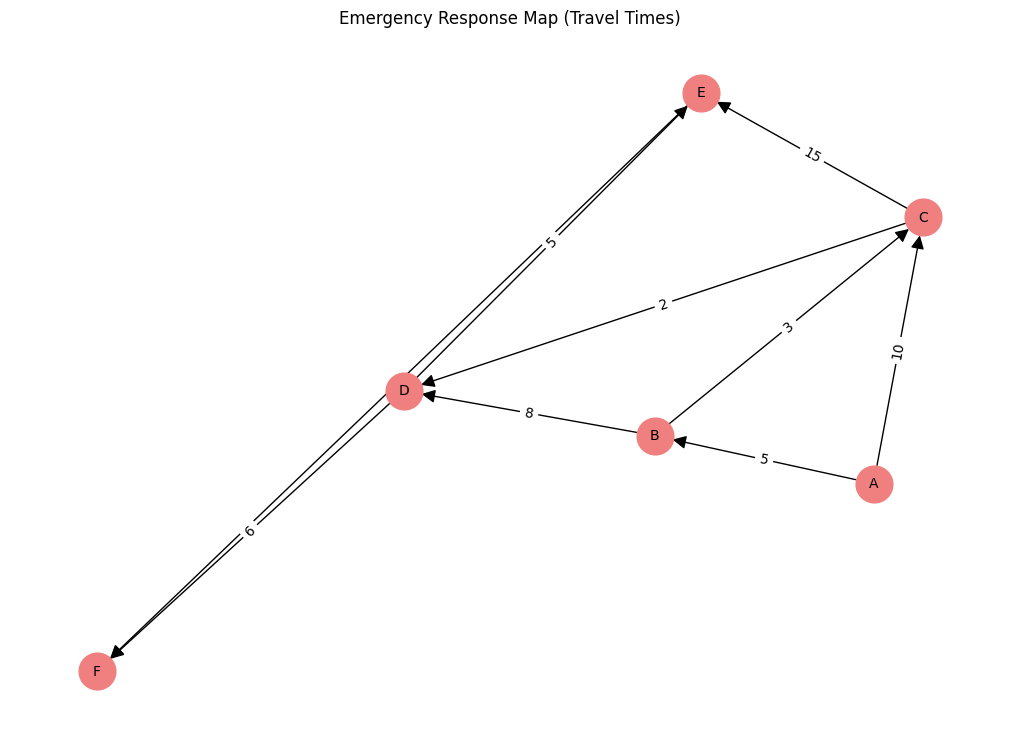

In [19]:
# --- Visualize the Input Graph ---
draw_graph(g.adj, "Emergency Response Map (Travel Times)")

In [20]:
# --- 2. Algorithm Execution & Profiling ---

# Use time module to measure execution time
start_time = time.time()

distances = g.dijkstra(source_node)

end_time = time.time()

# --- 3. Output ---
if distances:
    print("\n--- Dijkstra's Algorithm Results ---")
    print(f"Fastest travel times from {source_node}:")
    for node, distance in sorted(distances.items()):
        print(f"  To {node}: {distance}")

print(f"\nExecution Time: {end_time - start_time:.9f} seconds")


--- Dijkstra's Algorithm Results ---
Fastest travel times from A:
  To A: 0
  To B: 5
  To C: 8
  To D: 10
  To E: 15
  To F: 16

Execution Time: 0.000174522 seconds


In [21]:
# --- 4. Analysis ---
print("\n--- Analysis ---")
print("Time Complexity: O(E log V). With a min-heap (priority queue), inserting a node takes O(log V) and decreasing a key (updating distance) also takes O(log V). Every vertex is added to the heap once. We perform E 'relax' operations (checking neighbors), each of which might result in a heap push. Therefore, the total complexity is O((V + E) log V), which simplifies to O(E log V) for connected graphs (where E >= V-1).")
print("\nWhy Dijkstra is Unsuitable for Negative Weights: Dijkstra's is a 'greedy' algorithm. It assumes that once we find the shortest path to a node and 'finalize' it (i.e., pop it from the heap), that path is permanent. A negative edge encountered later could create a 'shortcut' and violate this assumption, leading to incorrect results. Bellman-Ford (Problem 2) does not make this greedy assumption and can handle negative weights.")



--- Analysis ---
Time Complexity: O(E log V). With a min-heap (priority queue), inserting a node takes O(log V) and decreasing a key (updating distance) also takes O(log V). Every vertex is added to the heap once. We perform E 'relax' operations (checking neighbors), each of which might result in a heap push. Therefore, the total complexity is O((V + E) log V), which simplifies to O(E log V) for connected graphs (where E >= V-1).

Why Dijkstra is Unsuitable for Negative Weights: Dijkstra's is a 'greedy' algorithm. It assumes that once we find the shortest path to a node and 'finalize' it (i.e., pop it from the heap), that path is permanent. A negative edge encountered later could create a 'shortcut' and violate this assumption, leading to incorrect results. Bellman-Ford (Problem 2) does not make this greedy assumption and can handle negative weights.


**Network Cable Installation**

In [22]:
import time
import heapq
import networkx as nx
import matplotlib.pyplot as plt
import sys

In [23]:
class Graph:
    def __init__(self):
        # Graph Modeling: Nodes are offices, edges are cable paths
        # Use an adjacency list
        self.adj = {}
        self.nodes = set()

    def add_edge(self, u, v, weight):
        """
        Adds an undirected edge between u and v with weight (cost).
        """
        self.nodes.add(u)
        self.nodes.add(v)

        if u not in self.adj:
            self.adj[u] = []
        if v not in self.adj:
            self.adj[v] = []

        self.adj[u].append((weight, v))
        self.adj[v].append((weight, u)) # Add edge in both directions

    def prims_mst(self, start_node):
        """
        Implements Prim's algorithm to find the Minimum Spanning Tree.
        Uses a priority queue (min-heap).
        """
        if start_node not in self.nodes:
            return f"Node {start_node} not in graph."

        mst_edges = []
        total_cost = 0
        visited = set()

        # Priority queue stores (cost, from_node, to_node)
        min_heap = [(0, start_node, start_node)] # (cost, from, to)

        while min_heap and len(visited) < len(self.nodes):
            cost, u, v = heapq.heappop(min_heap)

            if v in visited:
                continue

            visited.add(v)

            # Add to total cost and save the edge (except for the start node)
            if u != v: # u is the node it's connected from
                mst_edges.append((u, v, cost))
            total_cost += cost

            # Add all neighbors of the newly visited node 'v' to the heap
            if v in self.adj:
                for neighbor_cost, neighbor in self.adj[v]:
                    if neighbor not in visited:
                        heapq.heappush(min_heap, (neighbor_cost, v, neighbor))

        # Output: Total cost and list of edges
        return total_cost, mst_edges

In [24]:
def draw_graph(nodes, edge_list, title, mst_edges=None):
    """
    Visualizes the undirected, weighted graph.
    Optionally highlights MST edges.
    """
    G = nx.Graph() # Use nx.Graph() for undirected

    for node in nodes:
        G.add_node(node)

    for u, v, w in edge_list:
        G.add_edge(u, v, weight=w)

    pos = nx.spring_layout(G, seed=42)

    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, with_labels=True, node_color='skyblue',
            node_size=700, font_size=10)

    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Highlight MST edges if provided
    if mst_edges:
        mst_edge_tuples = [(u, v) for u, v, w in mst_edges]
        nx.draw_networkx_edges(G, pos, edgelist=mst_edge_tuples,
                               edge_color='r', width=3)

    plt.title(title)
    plt.show()

In [25]:
# --- 1. Graph Modeling & Input ---
g = Graph()

# Input: Undirected weighted graph [cite: 111]
# (Office_1, Office_2, Cable_Cost)
edges = [
    ('A', 'B', 4),
    ('A', 'C', 1),
    ('B', 'C', 2),
    ('B', 'D', 5),
    ('C', 'D', 8),
    ('C', 'E', 3),
    ('D', 'E', 6),
    ('D', 'F', 2),
    ('E', 'F', 7)
]

for u, v, w in edges:
    g.add_edge(u, v, w)

start_node = 'A'  # Start Prim's algorithm from this node

print("--- Problem 4: Network Cable Installation ---")
print(f"Graph created with {len(g.nodes)} offices (nodes).")
print(f"Finding Minimum Spanning Tree (MST) from: {start_node}")

--- Problem 4: Network Cable Installation ---
Graph created with 6 offices (nodes).
Finding Minimum Spanning Tree (MST) from: A


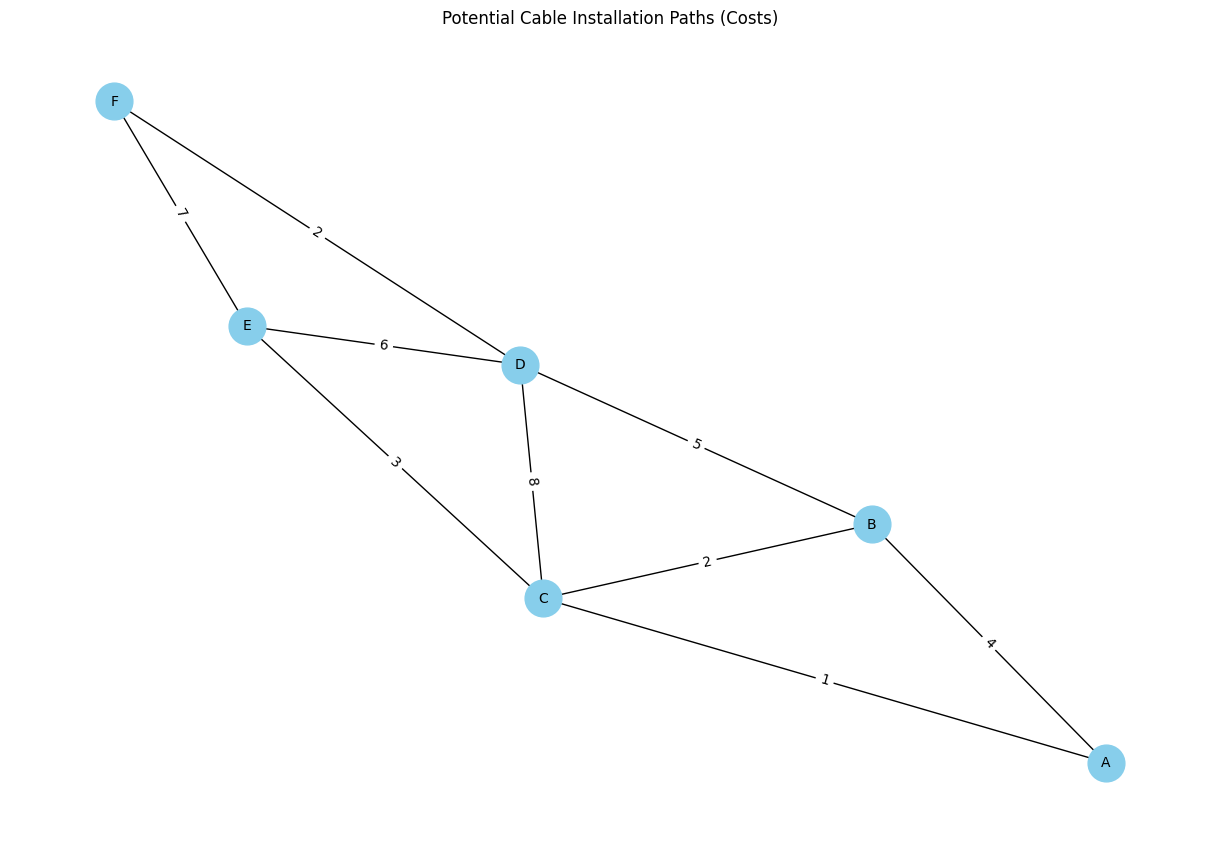

In [26]:
# --- Visualize the Input Graph ---
draw_graph(g.nodes, edges, "Potential Cable Installation Paths (Costs)")

In [27]:
# --- 2. Algorithm Execution & Profiling ---

# Use time module to measure execution time
start_time = time.time()

total_cost, mst_edges = g.prims_mst(start_node)

end_time = time.time()

# --- 3. Output ---
print("\n--- Prim's Algorithm MST Results ---")
print(f"Total minimum cost to connect all offices: {total_cost}")

print("\nEdges selected in MST:")
for u, v, cost in mst_edges:
    print(f"  {u} -- {v} (Cost: {cost})")

print(f"\nExecution Time: {end_time - start_time:.9f} seconds")


--- Prim's Algorithm MST Results ---
Total minimum cost to connect all offices: 13

Edges selected in MST:
  A -- C (Cost: 1)
  C -- B (Cost: 2)
  C -- E (Cost: 3)
  B -- D (Cost: 5)
  D -- F (Cost: 2)

Execution Time: 0.000488758 seconds


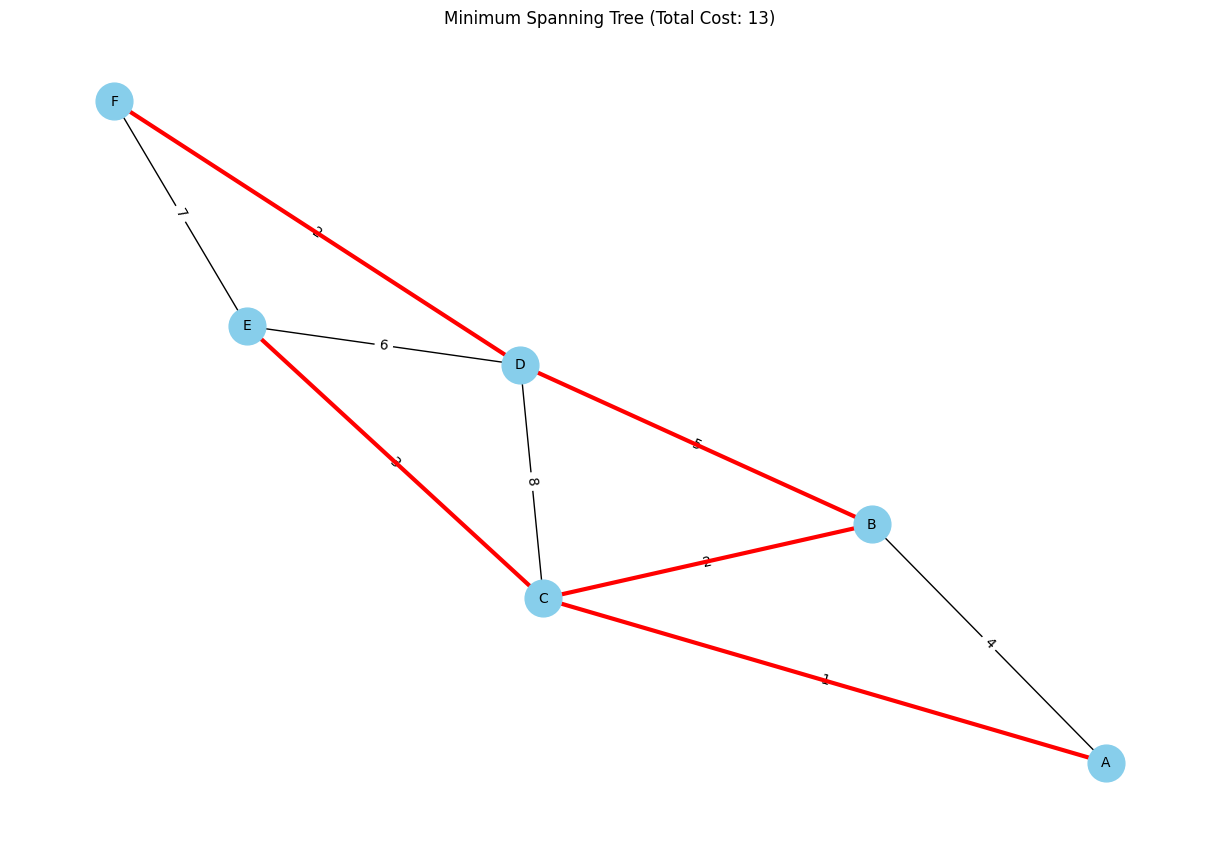

In [28]:
# --- Visualize the MST Result ---
draw_graph(g.nodes, edges, f"Minimum Spanning Tree (Total Cost: {total_cost})", mst_edges)

In [29]:
# --- 4. Analysis ---
print("\n--- Analysis ---")
print("Complexity Comparison")
print("  - Prim's (with min-heap): O(E log V). This is because we add all E edges to the heap in the worst case, and each heap operation (push/pop) takes O(log V) time.")
print("  - Kruskal's (with Union-Find): O(E log E). This is dominated by sorting all E edges. The Union-Find operations afterward are very fast (nearly constant time on average).")
print("  - Prim's is generally faster on dense graphs, while Kruskal's can be faster on sparse graphs (if E is much smaller than V^2).")

print("\nApplicability in Infrastructure")
print("MST algorithms are directly applicable to infrastructure cost optimization. This 'network cable' problem is a classic example. Other applications include connecting a power grid, designing road networks to connect towns, or laying water pipes, all with the goal of minimizing the total length (cost) of material while ensuring every 'node' (office, city, house) is connected to the network.")


--- Analysis ---
Complexity Comparison
  - Prim's (with min-heap): O(E log V). This is because we add all E edges to the heap in the worst case, and each heap operation (push/pop) takes O(log V) time.
  - Kruskal's (with Union-Find): O(E log E). This is dominated by sorting all E edges. The Union-Find operations afterward are very fast (nearly constant time on average).
  - Prim's is generally faster on dense graphs, while Kruskal's can be faster on sparse graphs (if E is much smaller than V^2).

Applicability in Infrastructure
MST algorithms are directly applicable to infrastructure cost optimization. This 'network cable' problem is a classic example. Other applications include connecting a power grid, designing road networks to connect towns, or laying water pipes, all with the goal of minimizing the total length (cost) of material while ensuring every 'node' (office, city, house) is connected to the network.
